Library Importation 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from google.colab.patches import cv2_imshow
from numpy.fft import fft, ifft
import skimage
from skimage import restoration
import scipy
from scipy.fftpack import fftn, ifftn
from astropy.io import fits
from scipy.ndimage import gaussian_filter as gf

Image Importation 


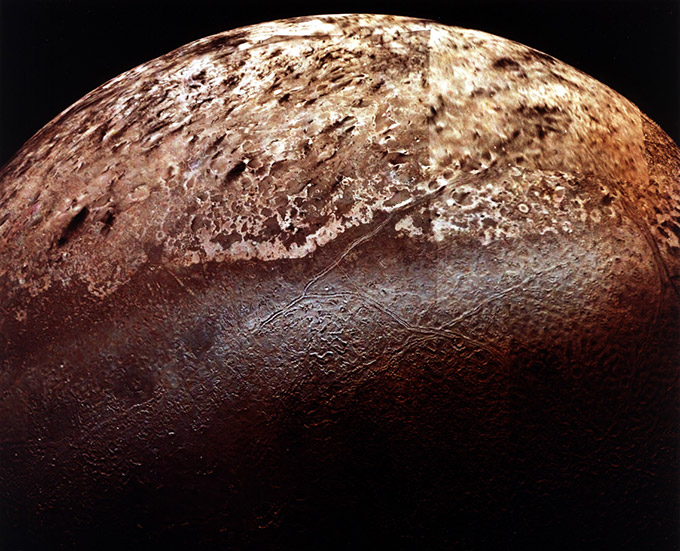

In [ ]:
planet = cv2.imread("/content/drive/MyDrive/EE610-Assignments/triton_voyager2.jpg")
Gplanet = cv2.imread("/content/drive/MyDrive/EE610-Assignments/triton_voyager2.jpg",0)  #grayscale reading
cv2_imshow(planet)

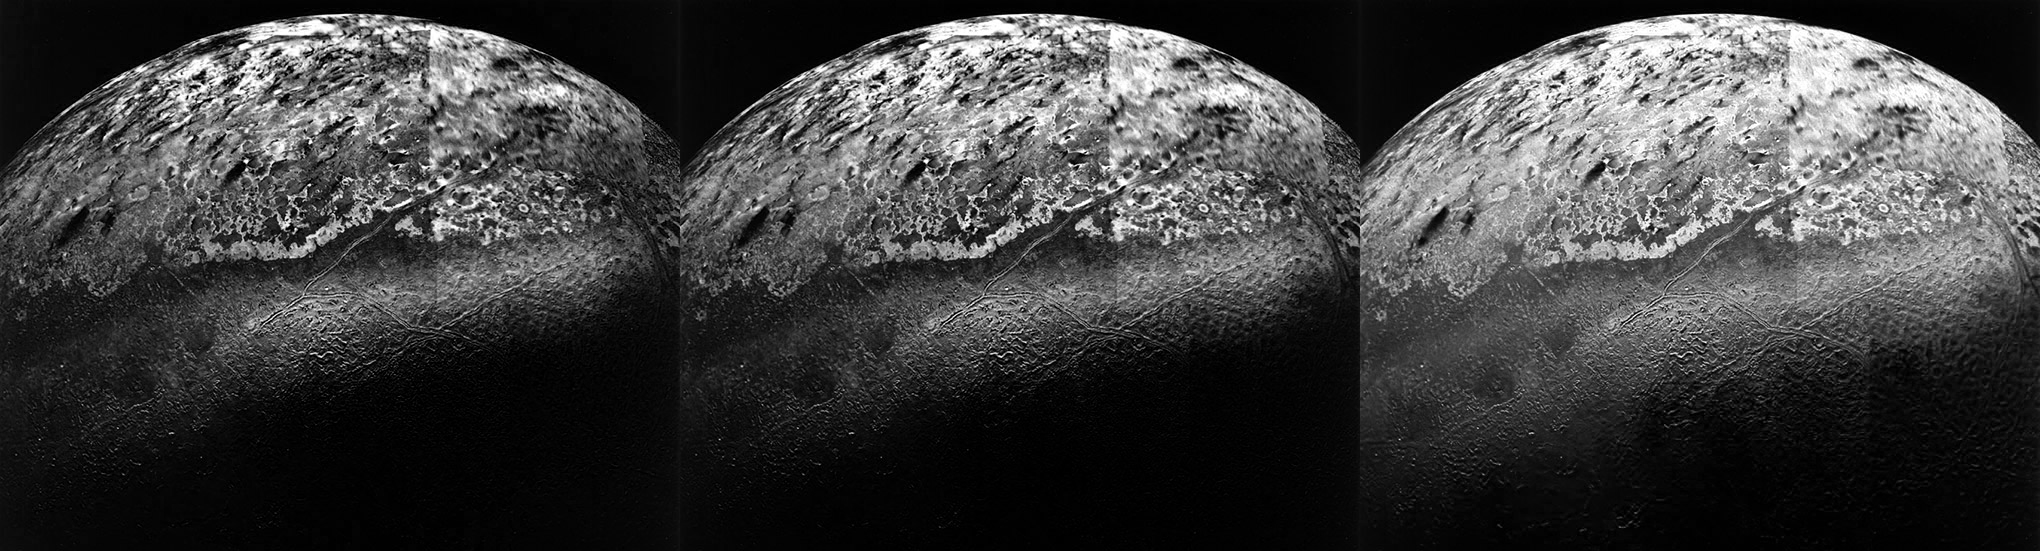

In [ ]:
planetR = planet[:,:,0] #red channel extraction
planetG = planet[:,:,1] #green channel extraction
planetB = planet[:,:,2] #blue channel extraction

comparison_rgb = np.hstack((planetR,planetG,planetB))
cv2_imshow(comparison_rgb)


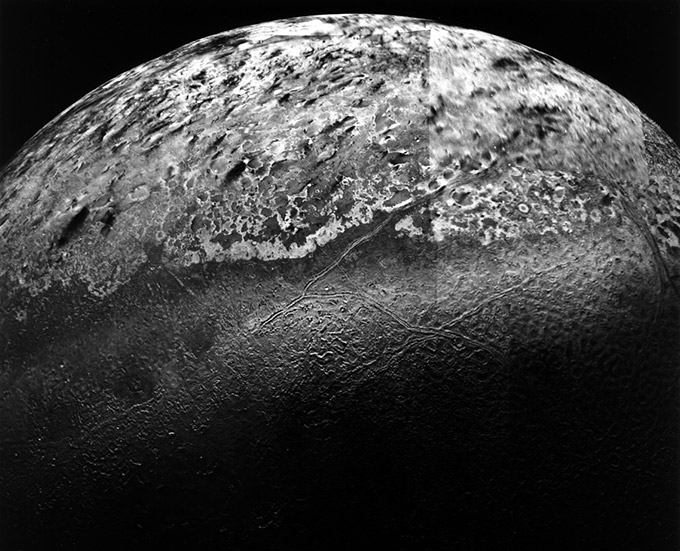

(551, 680)


In [ ]:
#grayscale image show
cv2_imshow(Gplanet)
print(Gplanet.shape)

Now we are plotting FFT of all the channel images to get the sence about FFT pattern and how to remove scan lines by modifying FFT

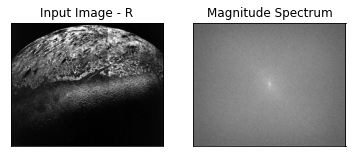

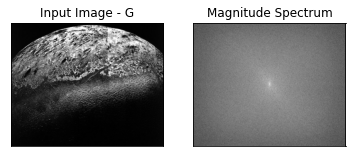

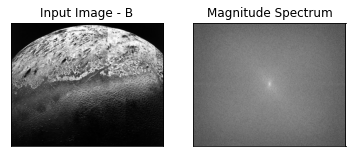

In [ ]:
''''''''''''''''''''''''''''''''''''
#R-channel image Logbase FFT plotting
img = planetR.copy()
f = np.fft.fft2(img)   #Frequency Furior Transform , it gives real part and imagenery part as 2 different output channel 
fshift = np.fft.fftshift(f)   #To shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift))    # to Brighten/Enhance very low intensities in FT we are converting it to Log scale

#Plotting
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image - R'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
'''''''''''''''''''''''''''''''''''''
#G-channel image Logbase FFT plotting(same as above)
img = planetG.copy()
f = np.fft.fft2(img)   #Frequency Furior Transform,  it gives real part and imagenery part as 2 different output channel 
fshift = np.fft.fftshift(f)   #To shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift))  # to Brighten/Enhance very low intensities in FT we are converting it to Log scale

#Plotting
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image - G'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

''''''''''''''''''''''''''''''''''''
#B-channel image Logbase FFT plotting(same as above)
img = planetB.copy()
f = np.fft.fft2(img)  #Frequency Furior Transform,  it gives real part and imagenery part as 2 different output channel 
fshift = np.fft.fftshift(f)   #To shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(np.abs(fshift)) # to Brighten/Enhance very low intensities in FT we are converting it to Log scale

#Plotting
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image - B'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


As we can see in above Magnitude Spectrum there is a very very faded horizontal line in middle of the Magnitude Spectrum.


---
To remove that line we will now create a mask of size same as image with zero value in the faded line region and 1 elsewhere.



In [ ]:
#mask creation 
mask = np.ones((Gplanet.shape[0],Gplanet.shape[1],2)) #array initiated with value 1
mask[265:285,0:225] = mask[265:285,0:225]*0  #masking 
mask[265:285,450:] = mask[265:285,450:]*0 


Now We will do FFT transforms to apply our created mask on that

In [ ]:
#Channel-R FFT code
img = planetR.copy()
fr = cv2.dft(np.float32(planetR),flags = cv2.DFT_COMPLEX_OUTPUT) #discrete Furior Transform
fshift = np.fft.fftshift(fr)     #
magnitudeR = fshift*mask  #mask application on Channel-R FFT

#Channel-G FFT Code
img = planetG.copy()
fg = cv2.dft(np.float32(planetG),flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(fg)
magnitudeG = fshift*mask  #mask application on Channel-G FFT

#Channel-B FFT Code
img = planetB.copy()
fb = cv2.dft(np.float32(planetB),flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(fb)
magnitudeB = fshift*mask  #mask application on Channel-B FFT



Now we will apply Inverse Furior Transform of Masked FFT to get enhanced image

In [ ]:
#Inverse Shift
imR = np.fft.ifftshift(magnitudeR)
imG = np.fft.ifftshift(magnitudeG)
imB = np.fft.ifftshift(magnitudeB)

#inverse Descrete FT
imr = cv2.idft(imR)
img = cv2.idft(imG)
imb = cv2.idft(imB)

#Calculation of magnitude of 2D vector
imr1 = cv2.magnitude(imr[:,:,0],imr[:,:,1])
img1 = cv2.magnitude(img[:,:,0],img[:,:,1])
imb1 = cv2.magnitude(imb[:,:,0],imb[:,:,1])
imR.shape

(551, 680, 2)

In [ ]:
#Scaling the image values
imr = imr1*255/imr1.max()
img = img1*255/img1.max()
imb = imb1*255/imb1.max()

In [ ]:
#Merging All the three Channels to get colored image
final = planet.copy()
final[:,:,0] = imr
final[:,:,1] = img
final[:,:,2] = imb

Output is pretty better, the scan line has been removed.

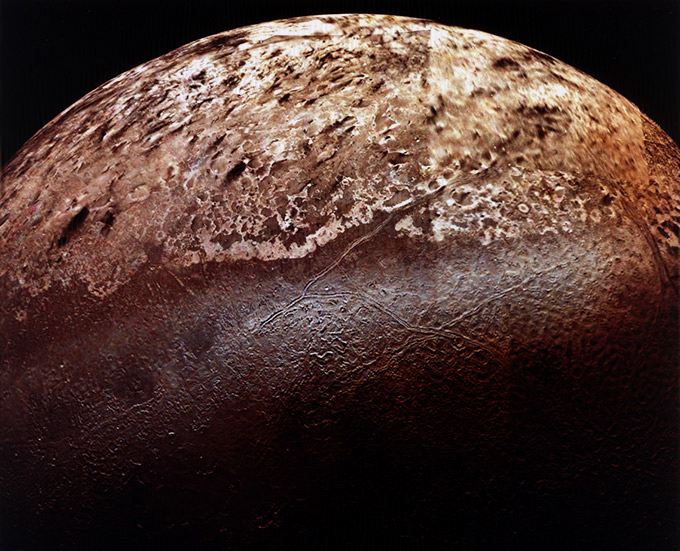

In [ ]:
cv2_imshow(final)

I had Used SobelX and SobelY libraries to remove verticle and horizontal lines, 
But it removes many small small lines and removes essential details from the image.



Source: 
*   https://scikit-image.org/
*   https://www.geeksforgeeks.org/
*   https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
*   https://scikit-learn.org/